<a href="https://colab.research.google.com/github/Arisarayangyoo/Python_dataviz2024/blob/main/Exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/MyDrive/data_viz_2024_DATA/'
data_file_path = os.path.join(path,'Data_Docter_ศ.นพ.ชวลิต.csv')
print(data_file_path)

Data_Docter = pd.read_csv(data_file_path)
Data_Docter.head()

Mounted at /content/drive
/content/drive/MyDrive/data_viz_2024_DATA/Data_Docter_ศ.นพ.ชวลิต.csv


,name,comments,ยอดไลค์,จำนวนการตอบกลับ
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5


In [ ]:
response_count = Data_Docter['จำนวนการตอบกลับ']
Like = Data_Docter['ยอดไลค์']

#**ให้เเสดงวิธีการจัดการข้อมูลและนำเสนอจุดที่น่าสนใจในข้อนี้มา 2 จุด**


## **มีคนที่ป่วยเป็นมะเร็งหรือมีคนใกล้ตัวป่วยเป็นมะเร็งมา comments เท่าไร คิดเป็นสัดส่วนเท่าไร**

In [ ]:
cancer_comments = Data_Docter[Data_Docter['comments'].str.contains('เป็นมะเร็ง')]
cancer_comments.info()
#มีคนที่ป่วยเป็นมะเร็งหรือมีคนใกล้ตัวป่วยเป็นมะเร็งมา comments 406 คน

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 1 to 1646
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             406 non-null    object
 1   comments         406 non-null    object
 2   ยอดไลค์          406 non-null    int64 
 3   จำนวนการตอบกลับ  406 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.9+ KB


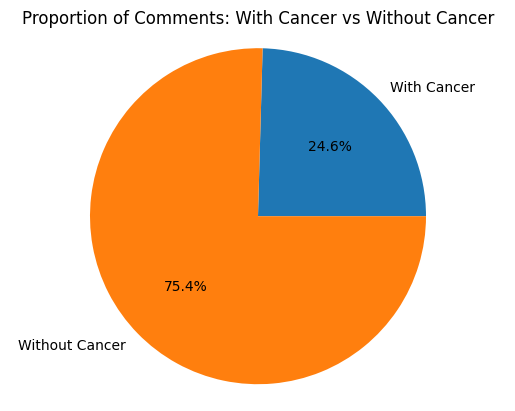

In [ ]:
#สร้างกราฟวงกลม ของ comments ที่มีคำว่าเป็นมะเร็งกับไม่มี
import matplotlib.pyplot as plt

# นับจำนวน comments ที่มีคำว่า "เป็นมะเร็ง" และไม่มี
cancer_count = len(cancer_comments)
non_cancer_count = len(Data_Docter) - cancer_count

# สร้าง labels และ sizes สำหรับกราฟวงกลม
labels = ['With Cancer', 'Without Cancer']
sizes = [cancer_count, non_cancer_count]

# สร้างกราฟวงกลม
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # ทำให้กราฟเป็นวงกลมสมบูรณ์

# ตั้งชื่อกราฟ
plt.title('Proportion of Comments: With Cancer vs Without Cancer')

# แสดงกราฟ
plt.show()


## **Like กับ response_count มีความสัมพันธ์กันหรือไม่**

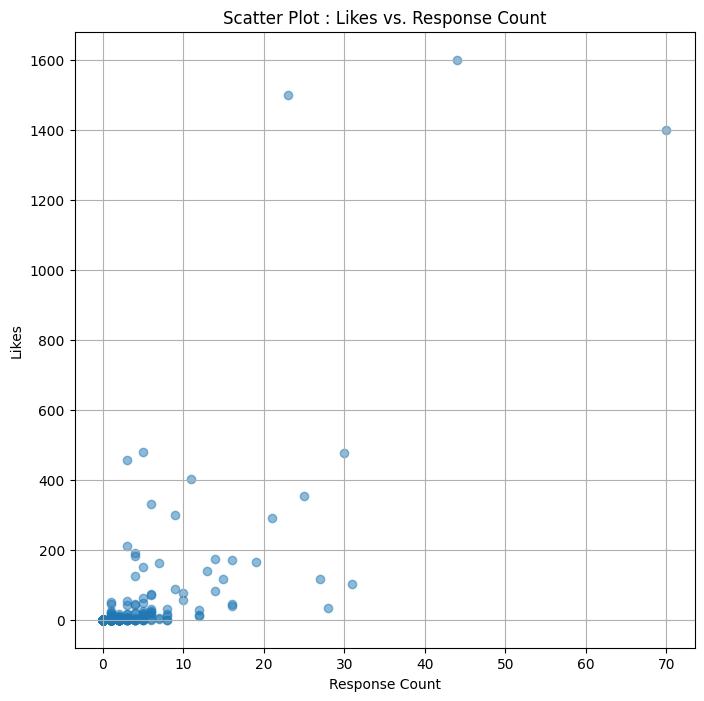

In [ ]:
# Scatter plot ของ Like กับ response_count
# สร้าง Scatter plot
plt.figure(figsize=(8, 8))  # กำหนดขนาดของกราฟ
plt.scatter(response_count, Like, alpha=0.5)  # alpha คือความโปร่งใสของจุด

# กำหนดชื่อแกนและชื่อกราฟ
plt.xlabel('Response Count')
plt.ylabel('Likes')
plt.title('Scatter Plot : Likes vs. Response Count')

# แสดงกราฟ
plt.grid(True)  # เพิ่มเส้นตาราง
plt.show()


## มีคนให้ความสนใจกับ comments ในโพสนี้มากเเค่ไหน

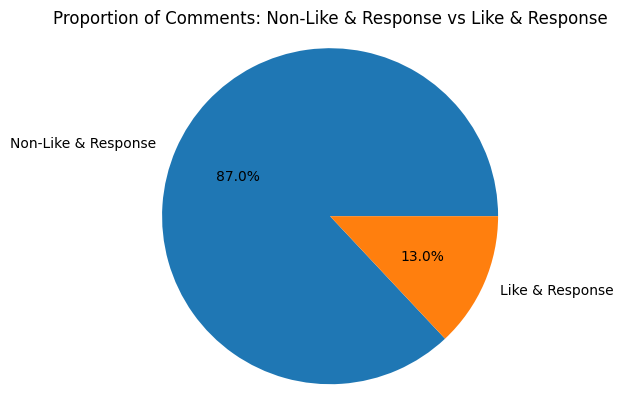

In [ ]:
# prompt: Comments ที่ Like and response_count เท่ากับ 0 กราฟวงกลม

import matplotlib.pyplot as plt
# กรองข้อมูลสำหรับ Comments ที่ Like and response_count เท่ากับ 0
zero_like_response = Data_Docter[(Data_Docter['ยอดไลค์'] == 0) & (Data_Docter['จำนวนการตอบกลับ'] == 0)]

# นับจำนวน Comments ที่ Like and response_count เท่ากับ 0 และไม่เท่ากับ 0
zero_count = len(zero_like_response)
non_zero_count = len(Data_Docter) - zero_count

# สร้าง labels และ sizes สำหรับกราฟวงกลม
labels = ['Non-Like & Response ', 'Like & Response ']
sizes = [zero_count, non_zero_count]

# สร้างกราฟวงกลม
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # ทำให้กราฟเป็นวงกลมสมบูรณ์

# ตั้งชื่อกราฟ
plt.title('Proportion of Comments: Non-Like & Response vs Like & Response')

# แสดงกราฟ
plt.show()
